<a href="https://colab.research.google.com/github/utkarsh-k-exp/Forecasting--Principles-and-Practice/blob/master/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from scipy import stats

# Helper Functions

In [65]:
# function for plotting time series

def plot_time_series(ts, x_label, y_label, header, fontsize=15):
  """
  Function to plot the time series
  """
  fi_gure = plt.figure(figsize = (20, 10))
  fi_gure = plt.plot(ts)
  fi_gure = plt.xlabel(x_label, fontsize = fontsize)
  fi_gure = plt.ylabel(y_label, fontsize = fontsize)
  fi_gure = plt.title(header, fontsize = fontsize)
  fi_gure = plt.grid()
  
  return fi_gure

# box cox transoformation function

def box_cox_transformation(ts, lambd):
  """
  Function will generate a box cox tranformation for the original time series to make variance constant across the data

  Arguments:
  ts -- a pandas series, an original time series
  lambd -- a scalar value, hyperparameter for power tranformation

  Returns:
  ts_transformed -- a pandas series, a time series with box cox tranformation applied
  """

  if lambd == 0:
    return np.log(ts)
  else:
    return (ts**lambd - 1)/lambd

# transform box cox transformed data to the original scale

def reverse_box_cox_tranformation(ts_transformed, lambd):
  """
  Function to reverse the box cox tranformation

  Arguments:
  ts_transformed -- a pandas series, time series on transformed scale
  lambd -- a scalar value, hyperparameter of box cox tranformation

  Returns:
  ts -- a pandas time series or dataframe, time series on original scale
  """
  if lambd == 0:
    return np.exp(ts_transformed)
  else:
    return (ts_transformed*lambd + 1)**(1/lambd)

# function to implement seasonal naive forecast

def s_naive_forecast(ts, seasonal_period):
  """
  Function implements the seasonal naive forecast for the time series data

  Arguments:
  ts -- pandas data frame, a time series data
  seasonal_perid -- duration in which pattern repeats itself. yearly = 1, quarterly = 4, monthly = 12

  Returns:
  ts -- a pandas data frame, extra predictions column added to the original data frame
  """
  predictions = ts.iloc[:, 0].copy()

  ts['predictions'] = predictions

  ts.predictions = ts.predictions.shift(seasonal_period, axis = 0)

  return ts

# function to implement the naive forecast

def naive_forecast(ts):
  """
  Function implements the naive forecast bechmark method
  
  Arguments:
  ts -- a pandas data frame, time series data

  Returns:
  ts -- a pandas data frame, an extra predictions column added to the original data frame
  """
  predictions = ts.iloc[:, 0].copy()

  ts['predictions'] = predictions

  ts.predictions = ts.predictions.shift(1, axis = 0)

  return ts

# function to implement the average forecasting benchmark method

def mean_forecast(ts):
  """
  Function implements the average forecasting benchmark method

  Arguments:
  ts -- a pandas data frame, a time series data

  Returns:
  ts -- a pandas data frame, an extra predictions columns added to the data frame
  """
  ts['predictions'] = np.mean(ts.iloc[:, 0])

  return ts

# Question: 1 

**For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance.****

1. usnetelec
2. usgdp
3. mcopper
4. enplanements

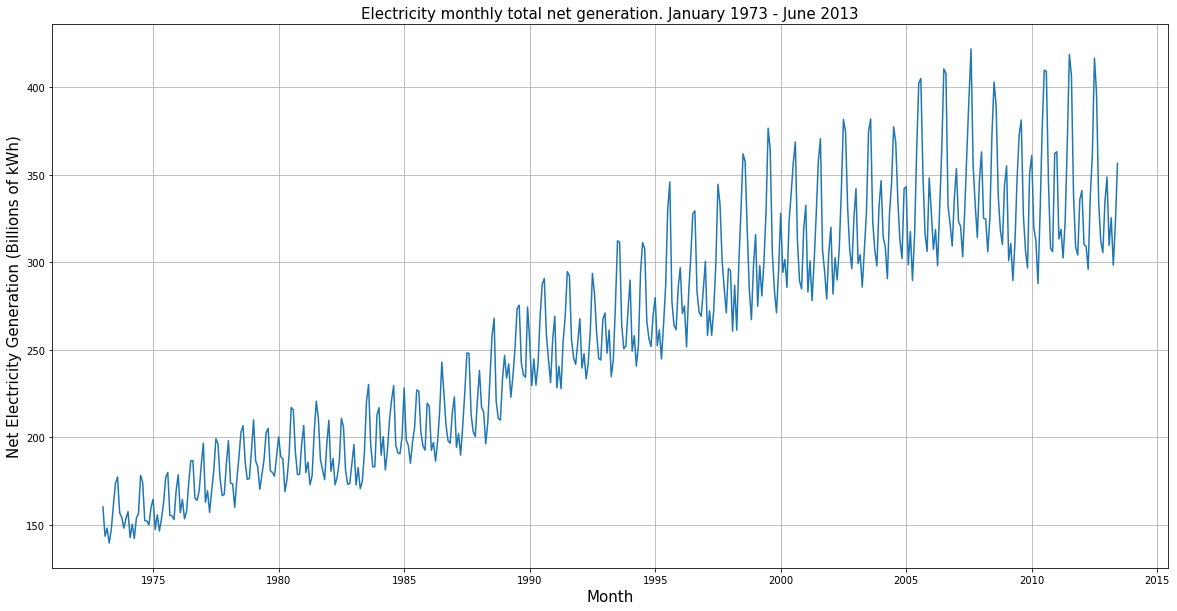

In [5]:
ts_usmelec = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usmelec.csv", index_col='time')  # making the time as index column
ts_usmelec.drop("Unnamed: 0", axis = 1, inplace = True)  # dropping the added index column

# plotting the time series
plt.figure(figsize = (20, 10))
plt.plot(ts_usmelec)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Net Electricity Generation (Billions of kWh)", fontsize = 15)
plt.title("Electricity monthly total net generation. January 1973 - June 2013", fontsize = 15)
plt.grid()
plt.show()

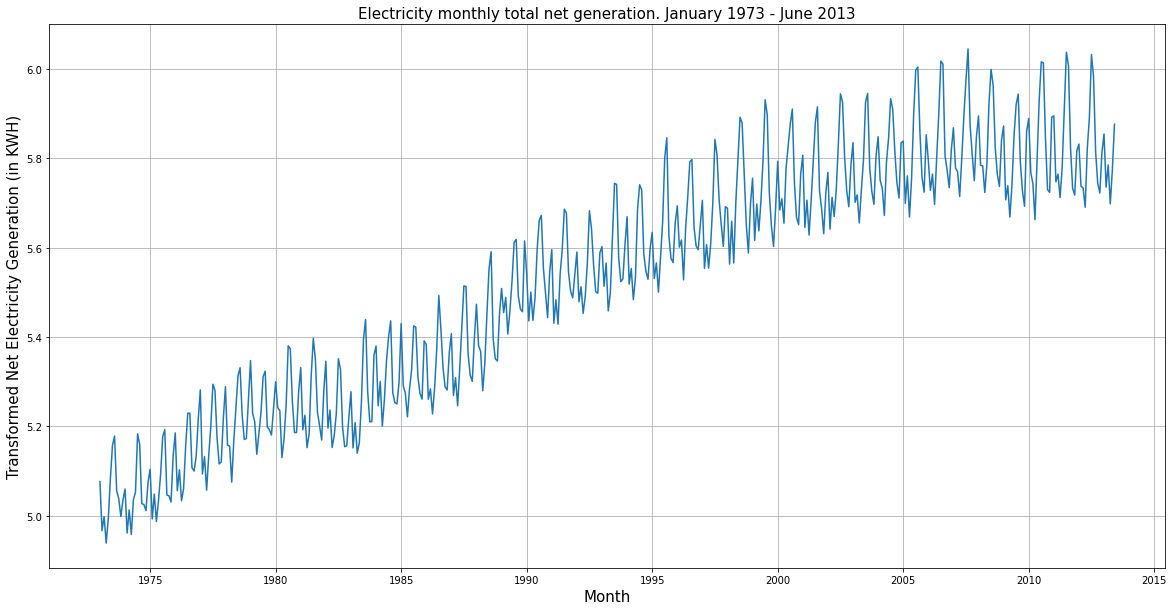

In [6]:
# applying the box cox tranformation on the usmelec time series
lamdb = 0.4  # setting the hyper parameter for box cox tranformation
ts_usmelec_transformed = box_cox_transformation(ts_usmelec, 0)
plt.figure(figsize = (20, 10))
plt.plot(ts_usmelec_transformed)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Transformed Net Electricity Generation (in KWH)", fontsize = 15)
plt.title("Electricity monthly total net generation. January 1973 - June 2013", fontsize = 15)
plt.grid()
plt.show()

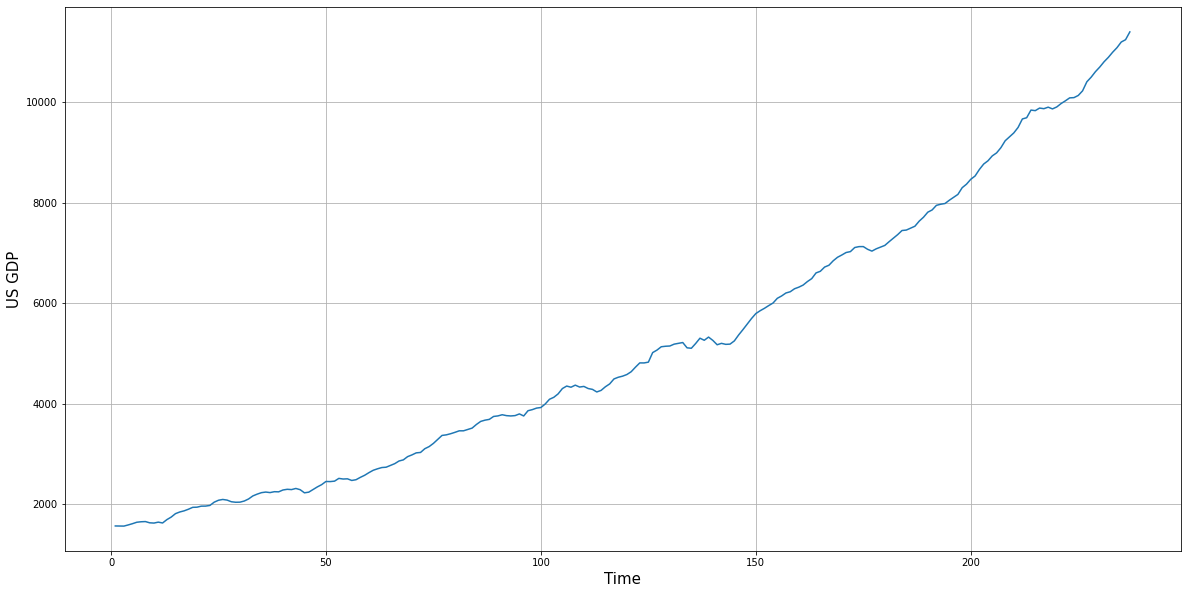

In [7]:
# tranformation of usgdp data

ts_usgdp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usgdp.csv", index_col = "Unnamed: 0")
plt.figure(figsize = (20, 10))
plt.plot(ts_usgdp)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("US GDP", fontsize = 15)
plt.grid()
plt.show()

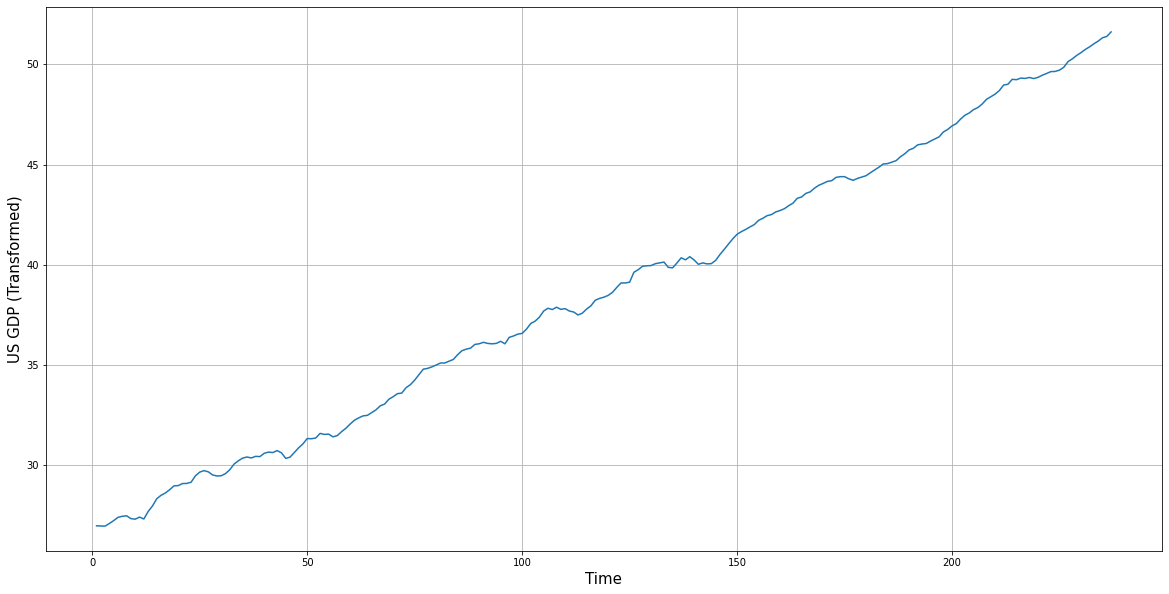

In [8]:
lambd = 0.3
ts_usgdp_transformed = box_cox_transformation(ts_usgdp, lambd)
plt.figure(figsize = (20, 10))
plt.plot(ts_usgdp_transformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("US GDP (Transformed)", fontsize = 15)
plt.grid()
plt.show()

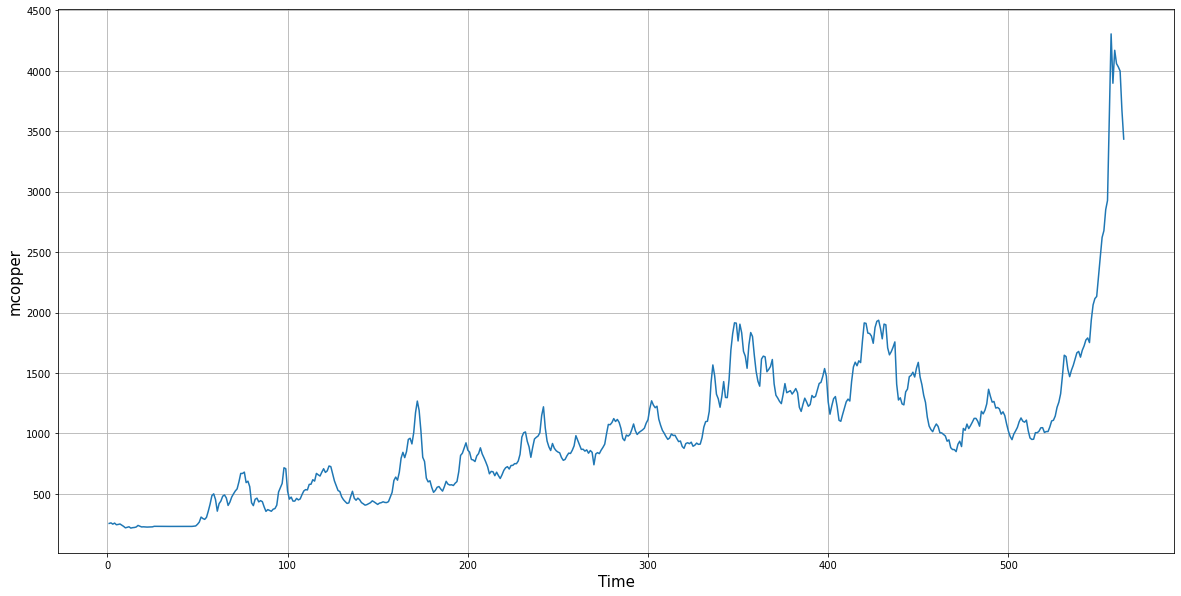

In [9]:
# tranformation of mcopper data

ts_mcopper = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/mcopper.csv", index_col = "Unnamed: 0")

plt.figure(figsize = (20, 10))
plt.plot(ts_mcopper)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("mcopper", fontsize = 15)
plt.grid()
plt.show()

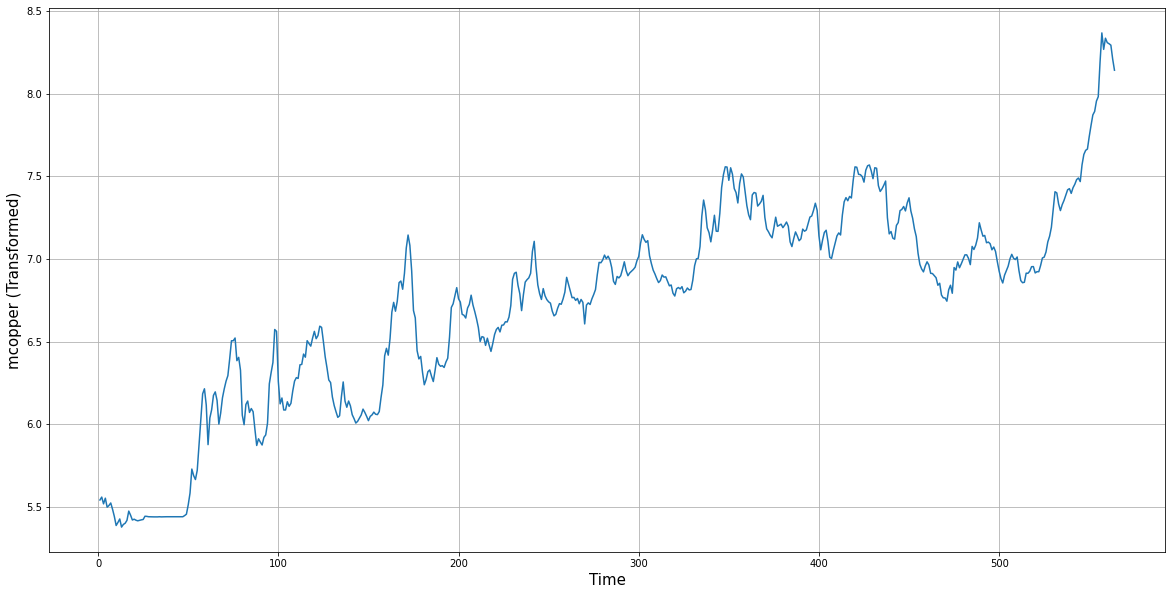

In [10]:
lambd = 0
ts_mcopper_transformed = box_cox_transformation(ts_mcopper, lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_mcopper_transformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("mcopper (Transformed)", fontsize = 15)
plt.grid()
plt.show()

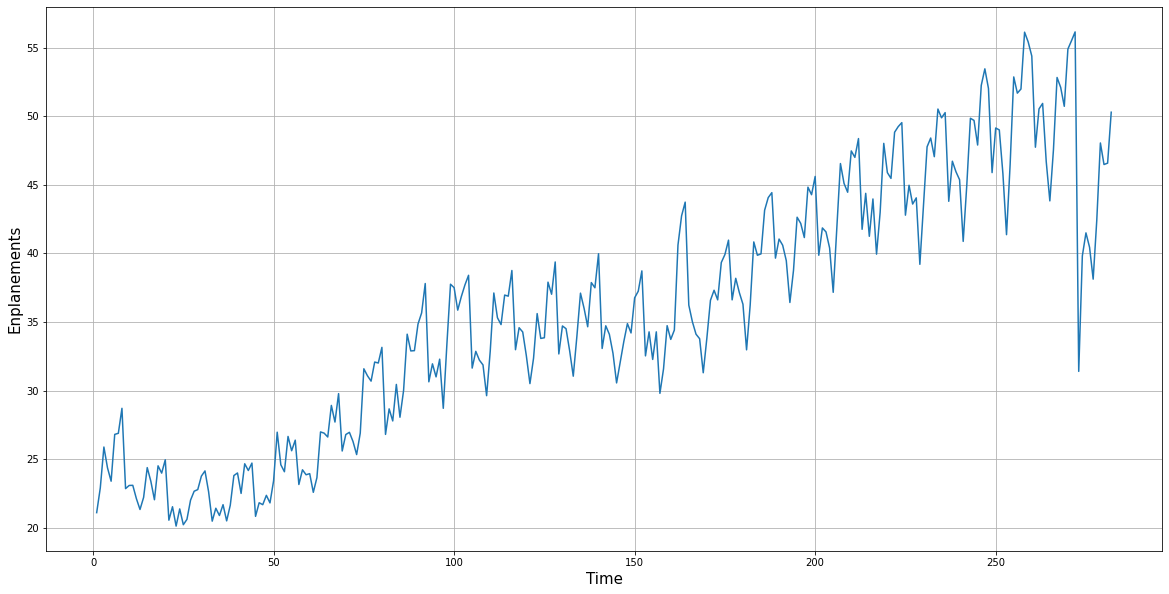

In [11]:
# tranformation of enplanements data

ts_enplanements = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/enplanements.csv", index_col = "Unnamed: 0")

plt.figure(figsize = (20, 10))
plt.plot(ts_enplanements)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Enplanements", fontsize = 15)
plt.grid()
plt.show()

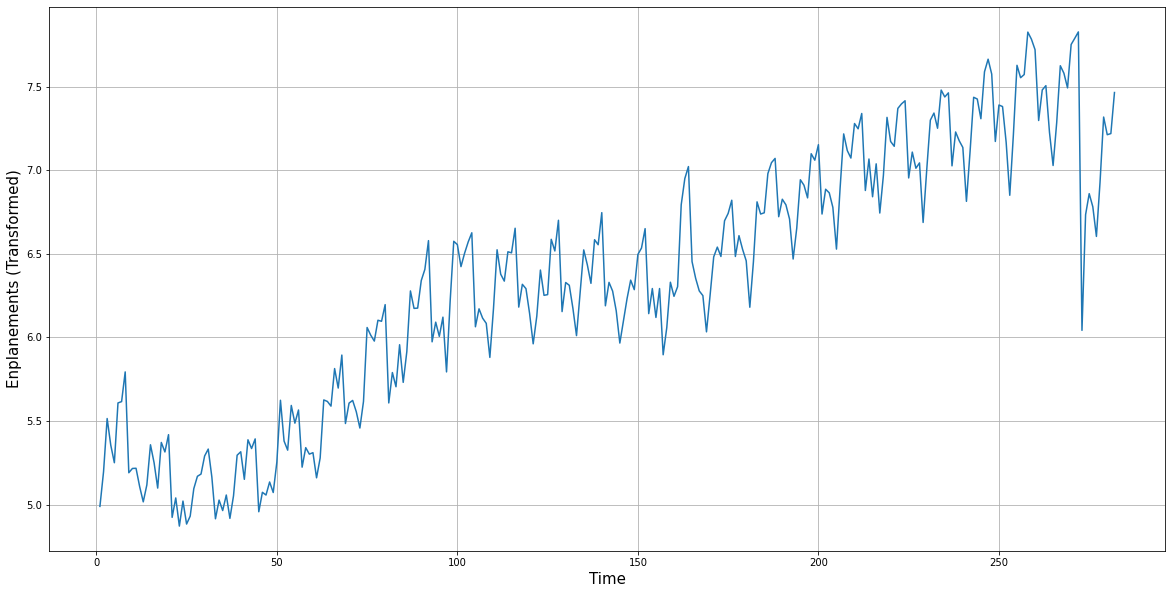

In [12]:
lambd = 0.3
ts_enplanements_tranformed = box_cox_transformation(ts_enplanements, lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_enplanements_tranformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Enplanements (Transformed)", fontsize = 15)
plt.grid()
plt.show()

# Question: 2

Why is a Box-Cox transformation unhelpful for the cangas data?

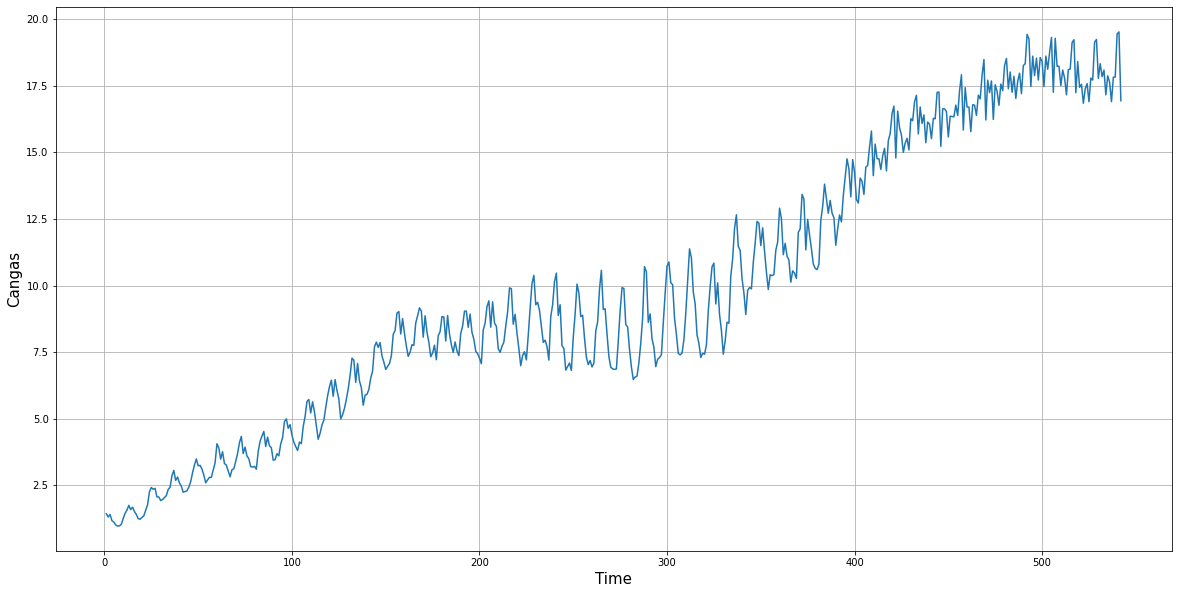

In [13]:
# importing the cangas data

ts_cangas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/cangas.csv", index_col="Unnamed: 0")

plt.figure(figsize = (20, 10))
plt.plot(ts_cangas)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Cangas", fontsize = 15)
plt.grid()
plt.show()

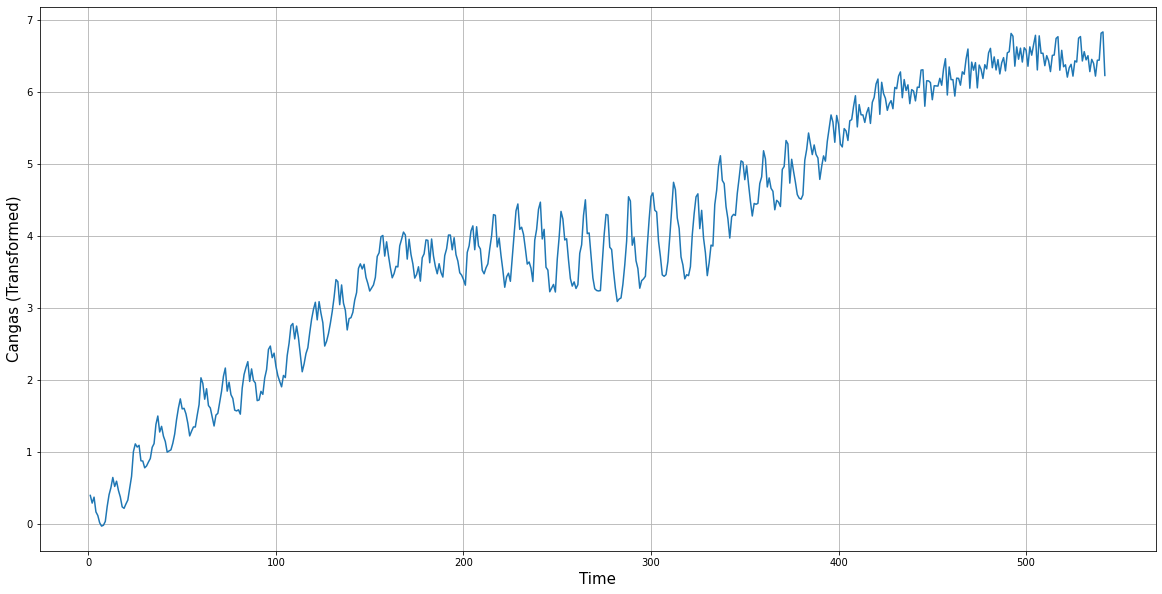

In [14]:
lambd = 0.5

ts_cangas_tranformed = box_cox_transformation(ts_cangas, lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_cangas_tranformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Cangas (Transformed)", fontsize = 15)
plt.grid()
plt.show()

**Answer**

After picking the best possible values for lambda, we are not able to stabilize the variance across the data. Using box cox tranformation is of no use in case of "cangas" data.

# Question: 3

What Box-Cox transformation would you select for your retail data (from Exercise 3 in Section 2.10)?

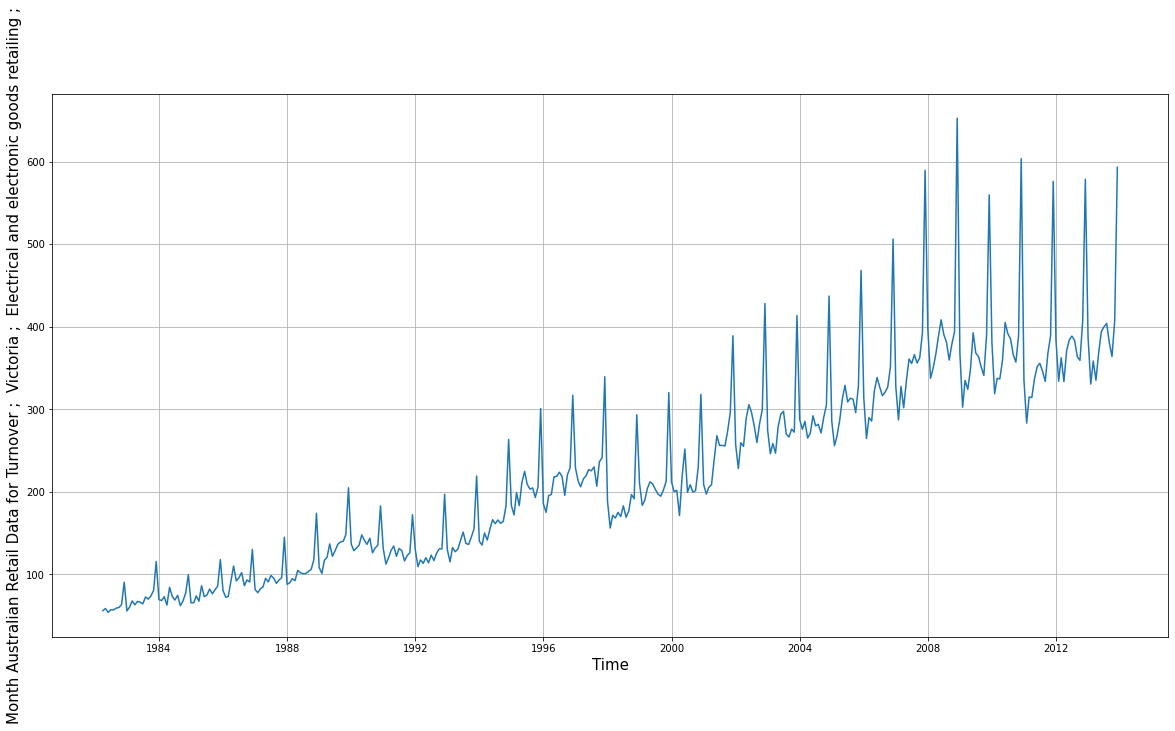

In [15]:
# importing the retail data

ts_retail = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/retail.xlsx", skiprows=[1], index_col="Unnamed: 0")

categories = ts_retail.columns  # list of all the columns
random_category = np.random.choice(categories)  # picking a random column

plt.figure(figsize = (20, 10))
plt.plot(ts_retail[random_category])
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Month Australian Retail Data for " + random_category, fontsize = 15)
plt.grid()
plt.show()

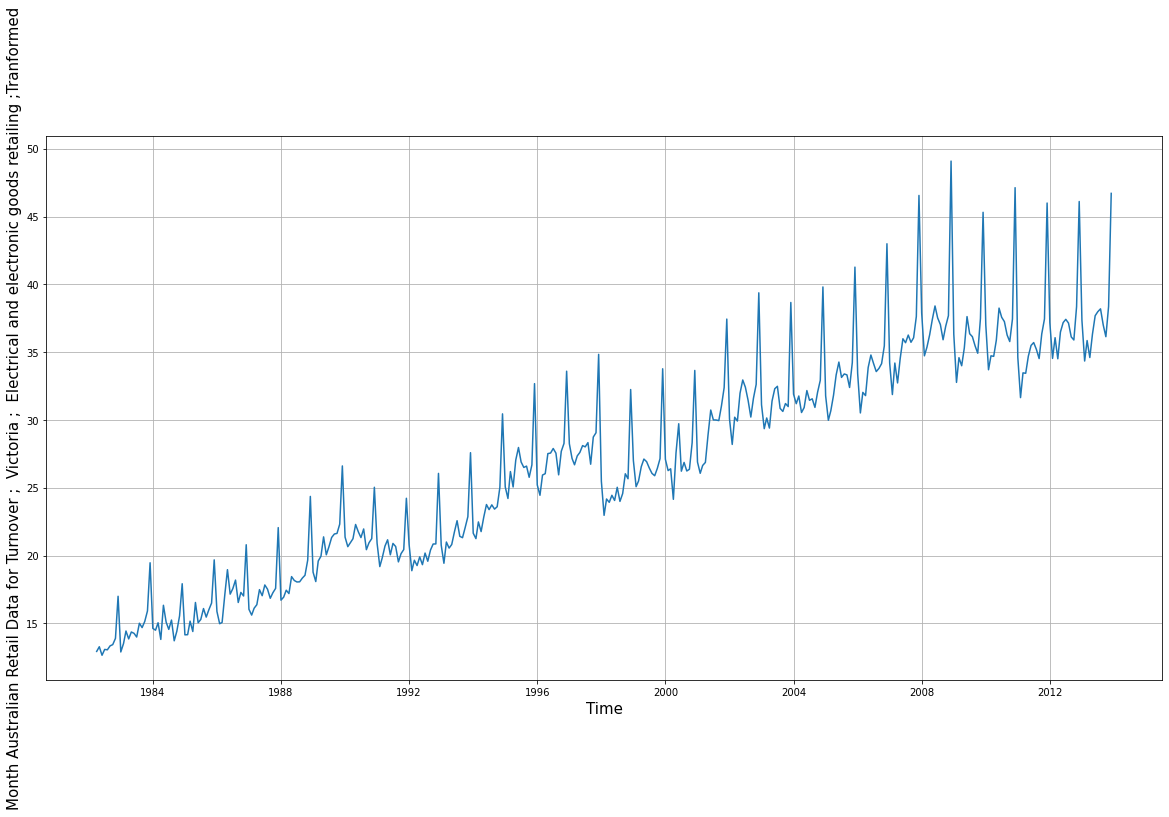

In [16]:
# applying tranformation on the data
lambd = 0.5

ts_retail_tranformed = box_cox_transformation(ts_retail[random_category], lambd)

plt.figure(figsize = (20, 10))
plt.plot(ts_retail_tranformed)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Month Australian Retail Data for " + random_category + "Tranformed", fontsize = 15)
plt.grid()
plt.show()

# Question: 5

Calculate the residuals from a seasonal naïve forecast applied to the quarterly Australian beer production data from 1992

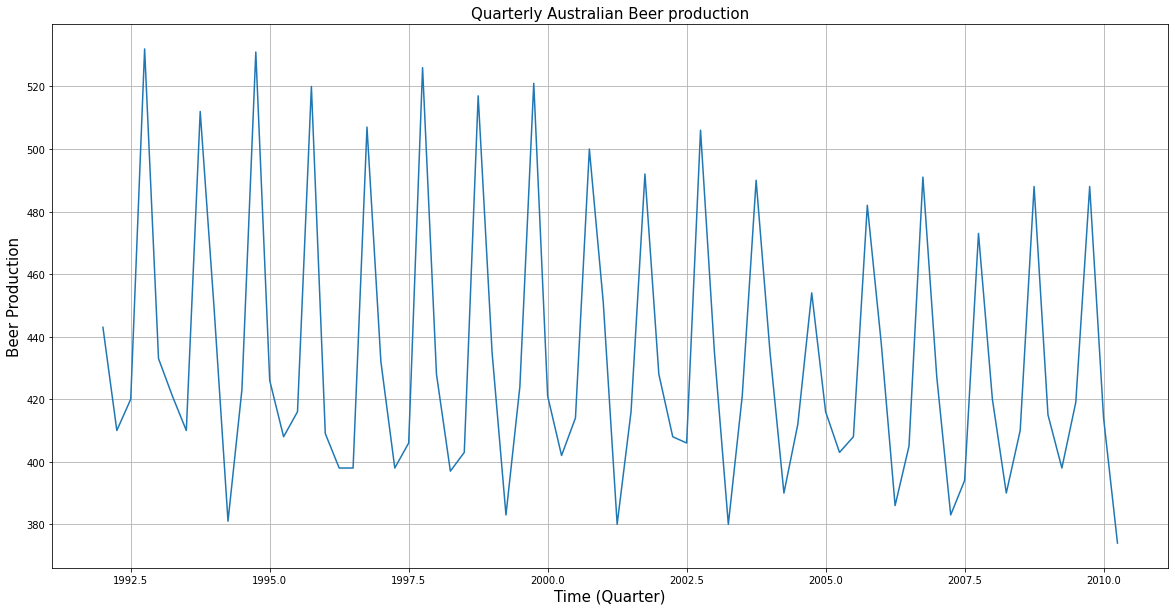

In [17]:
# importing the australian beer data
ts_ausbeer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/ausbeer.csv", index_col = "time")  # keeping time as index columns
ts_ausbeer.drop("Unnamed: 0", axis = 1, inplace = True)

ts_ausbeer = ts_ausbeer.loc[1992.0:, :]  # slicing data from 1992 onwards

# plotting the data
plt.figure(figsize = (20, 10))
plt.plot(ts_ausbeer)
plt.xlabel("Time (Quarter)", fontsize = 15)
plt.ylabel("Beer Production", fontsize = 15)
plt.title("Quarterly Australian Beer production", fontsize = 15)
plt.grid()
plt.show()

In [29]:
seasonal_period = 4  # since we have quarterly data, the seasonal period would be 4

ts_ausbeer = s_naive_forecast(ts_ausbeer, seasonal_period)

,value,predictions,residuals
time,,,
1992.00,443,NaN,NaN
1992.25,410,NaN,NaN
1992.50,420,NaN,NaN
1992.75,532,NaN,NaN
1993.00,433,443.0,-10.0


In [30]:
ts_ausbeer['residuals'] = ts_ausbeer.value - ts_ausbeer.predictions

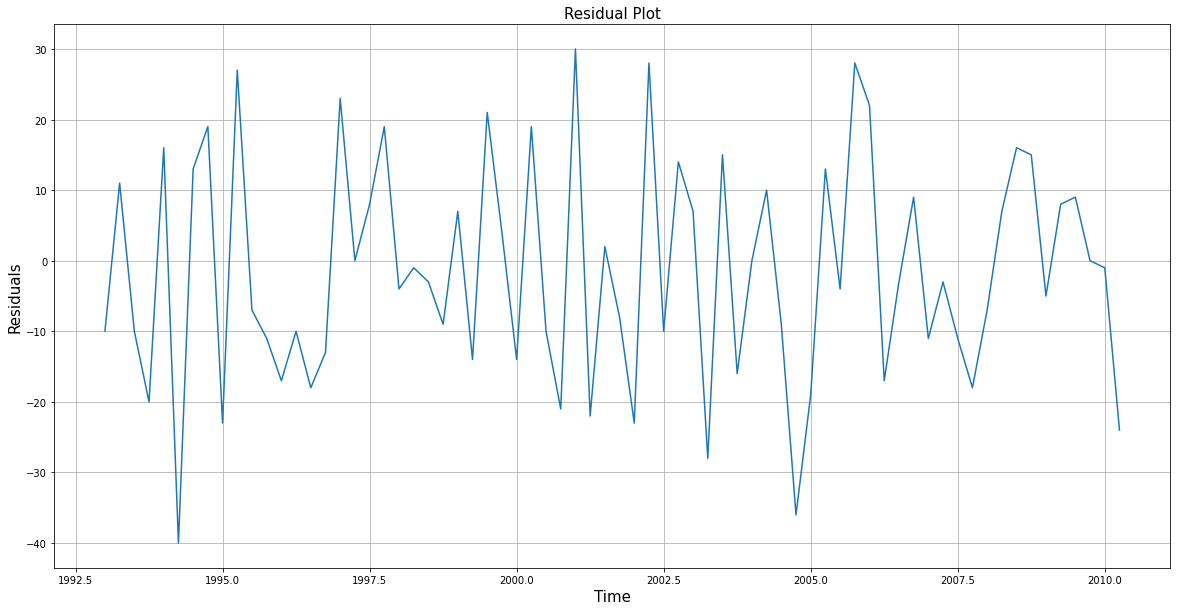

Mean of the residuals:  -1.5714285714285714


In [31]:
# plotting the residuals

plt.figure(figsize = (20, 10))
plt.plot(ts_ausbeer.residuals)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Residuals", fontsize = 15)
plt.title("Residual Plot", fontsize = 15)
plt.grid()
plt.show()

# computing the mean of the residuals
print("Mean of the residuals: ", np.mean(ts_ausbeer.residuals))

(array([ 4.09851666,  4.10573023,  8.23678151, 29.76773577, 31.12562977,
        31.56541311, 32.25294831, 32.26892993]),
 array([4.29208541e-02, 1.28366591e-01, 4.13634077e-02, 5.45725912e-06,
        8.84713792e-06, 1.97647272e-05, 3.64564499e-05, 8.33561066e-05]))

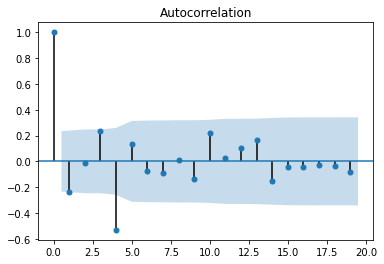

In [21]:
# Plotting the auto-correlation function plot for the residuals

plot_acf(ts_ausbeer.iloc[4:, 2])

# implemeting ljung-box test for testing the auto-correaltion amongst residuals

sm.stats.acorr_ljungbox(ts_ausbeer.iloc[4:, 2], lags=8)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


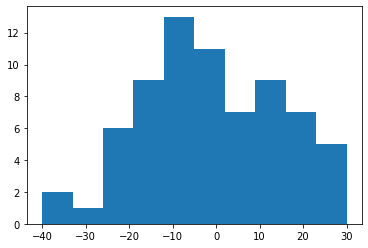

In [22]:
# plotting the histogram for the residuals

plt.hist(ts_ausbeer.residuals)
plt.show()

**Time Series Plot for Residuals**

A residuals should have two main properties:

1. **No auto-correlation**: Looks like there is one lag that has a significant auto-correlation. But, this could be a false positive and it's safe to assume that there is no auto-correlation between the residuals. 
  
  **Add-on: Ljung-Box test states the null hypotehesis as residuals are white noise. But p-value in our test is very low and null hypothesis can be rejected.**

2. **Zero mean**: Mean for the residuals is -1.57 which is close to zero. So, safe to assume that mean is close to zero.

A residuals will give better prediction intervals if it satifies additional two properties:

1. **Contant Variance**: Looking at time series plot, it is safer to assume that we have contant variance in the residuals.

2. **Residuals are normally distributed**: Plotting the histogram suggests right skewness in the data. This can be resolved by taking the box-cox tranformation of the original data. 

**Conclusion:**

Ljung box test gives us very low p-value and hence we reject the null hypothesis in favour of alternative hypothesis that there is auto-correlation between residuals and hence it is not a white noise. 

**This means that residuals failed to capture all the available information in the data**

# Question: 6

Repeat the exercise for the WWWusage and bricksq data. Use whichever of naive() or snaive() is more appropriate in each case.

**Starting with WWWusage**

In [35]:
# importing both the data sets
ts_wwwusage = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/WWWusage.csv', index_col='time')
ts_wwwusage.drop("Unnamed: 0", axis = 1, inplace = True)

ts_bricksq = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/bricksq.csv", index_col='Unnamed: 0')

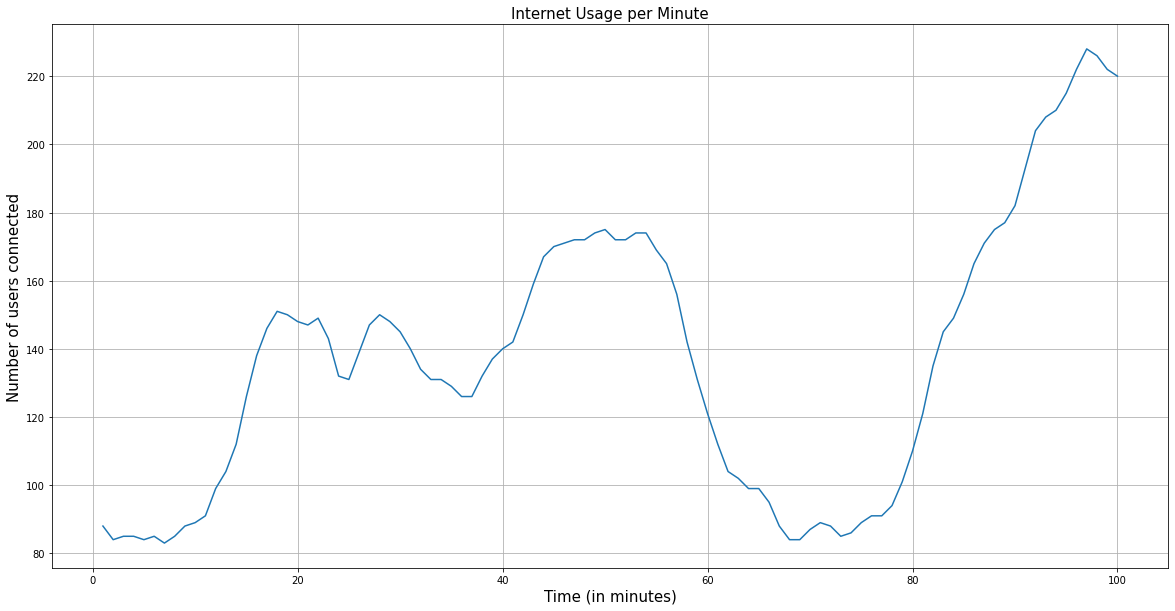

In [36]:
# plotting the WWWusage data

plt.figure(figsize = (20, 10))
plt.plot(ts_wwwusage)
plt.xlabel("Time (in minutes)", fontsize = 15)
plt.ylabel("Number of users connected", fontsize = 15)
plt.title("Internet Usage per Minute", fontsize = 15)
plt.grid()
plt.show()

Time Series Plot Insights: There is no visible pattern or seasonality. Looks like a random walk to me. 

**The best method for random walk data is naive()**

In [39]:
ts_wwwusage_forecasts = naive_forecast(ts_wwwusage)  # making predictions for the observations

ts_wwwusage_forecasts['residuals'] = ts_wwwusage_forecasts.value - ts_wwwusage_forecasts.predictions  # computing the residuals

**Plotting the time series, ACF plot and histogram for the residuals. Alongside, performing the ljung-box for testing the auto-correlation**

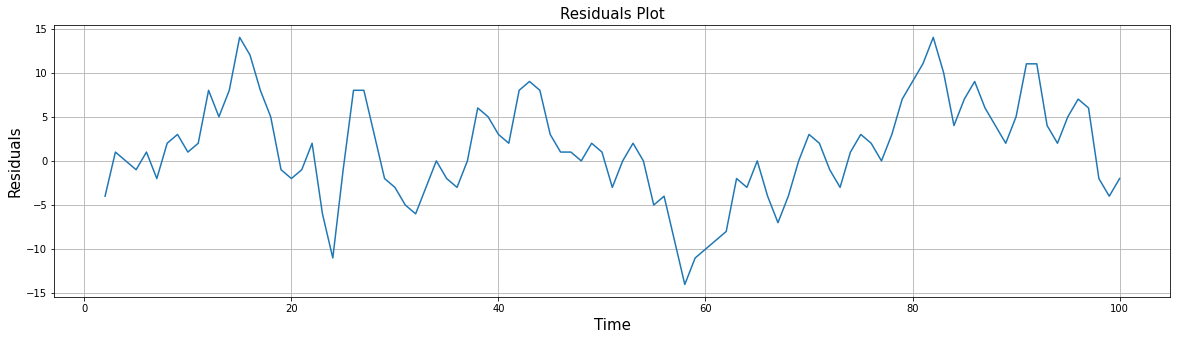

Mean of the residuals:  1.3333333333333333


In [48]:
plt.figure(figsize = (20, 5))
plt.plot(ts_wwwusage_forecasts.residuals)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Residuals", fontsize = 15)
plt.title("Residuals Plot", fontsize = 15)
plt.grid()
plt.show()

print("Mean of the residuals: ", np.mean(ts_wwwusage_forecasts.residuals))

(array([ 63.9619207 ,  91.81382312, 108.99528911, 124.35572656,
        136.05029379, 141.54480801, 142.72421309, 142.98655018,
        143.814859  , 145.58492642]),
 array([1.26847450e-15, 1.15579717e-20, 1.80529718e-23, 6.26703348e-26,
        1.23584186e-27, 4.73047509e-28, 1.36517680e-27, 5.67357988e-27,
        1.68042604e-26, 3.01271971e-26]))

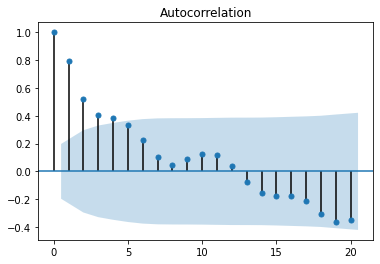

In [46]:
# plotting the auto-correlation plot

plot_acf(ts_wwwusage_forecasts.iloc[1:, 2])

# performing the ljung-box test for testing the auto-correlations amongst the residuals

sm.stats.acorr_ljungbox(ts_wwwusage_forecasts.iloc[1:, 2], lags=10)

(0.9891008138656616, 0.5996686220169067)


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


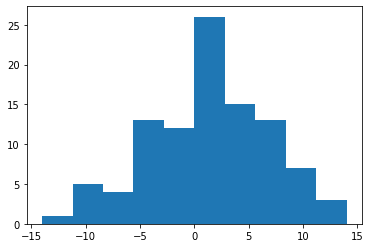

In [59]:
# checking the distribution of residuals

plt.hist(ts_wwwusage_forecasts.residuals)

shapiro_test = stats.shapiro(ts_wwwusage_forecasts.iloc[1:, 2])

print(shapiro_test)

**Conclusion**

If the residual's properties are same as that of white noise property. Then, we can say that we have captured all the available information present in the data.

For residuals to be same as that of white noise, it must satisfy some properties:

1. **No Auto-correlation**: Both the ACF plot and the result of ljung-box test suggests that there is an auto-correlation between the residuals. Ljung-box assumes null hypothesis as that there is no auto-correlation but p < 0.005 and hence we reject the null hypothesis in favour of presence of auto-correlation between residuals.

2. **Zero Mean**: Mean of the residuals is 1.33. Close to zero but not exact zero.

Residuals should also satify two additional properties to construct a better prediction intervals around the point forecast

1. **Contant Variance**: Looks like residuals have contant variance across mean. Both time series and histogram justifies that. Though if not then this can be easily resolved by taking box-cox transformation

2. **Normal Districution**: Looks like residuals are normally districuted from histogram. Shapiro-wilik test also confirms the normal distribution of residuals. This test assumes null hypothesis as normal districution and p > 0.005 and therefore we fail to reject the null hypothesis. 

**Conclusion**: Since, residuals are not same as white noise. Therefore, we need to find a better model that can capture all the available information in our data. Naive method is not enough.

**Let's check the "bricksq" data**

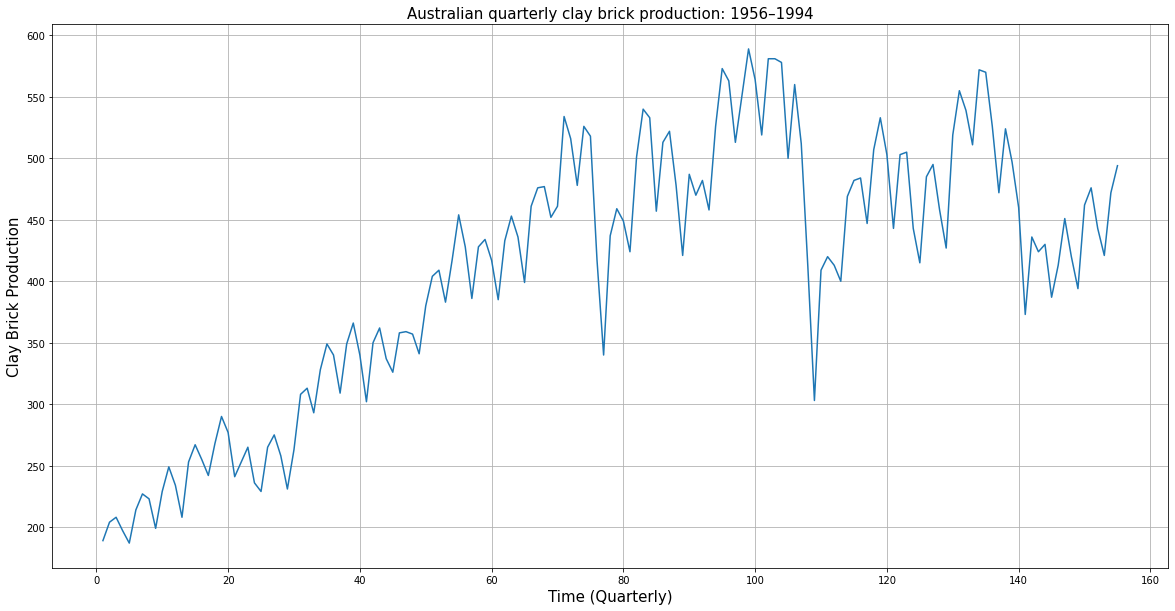

In [96]:
# plotting the bricksq data

figure = plot_time_series(ts_bricksq.x, "Time (Quarterly)", "Clay Brick Production", "Australian quarterly clay brick production: 1956–1994")

Data is seasonal. Seasonal naive is the suitable option for benchmarking.

In [81]:
# forecasting the data using seasonal naive

seasonal_period = 4  # quarterly data

ts_bricksq_forecasts = s_naive_forecast(ts_bricksq, seasonal_period)  # computing the forecasts

ts_bricksq_forecasts['residuals'] = ts_bricksq_forecasts.x - ts_bricksq_forecasts.predictions  # computing the residuals

Mean of the residuals:  6.8344370860927155


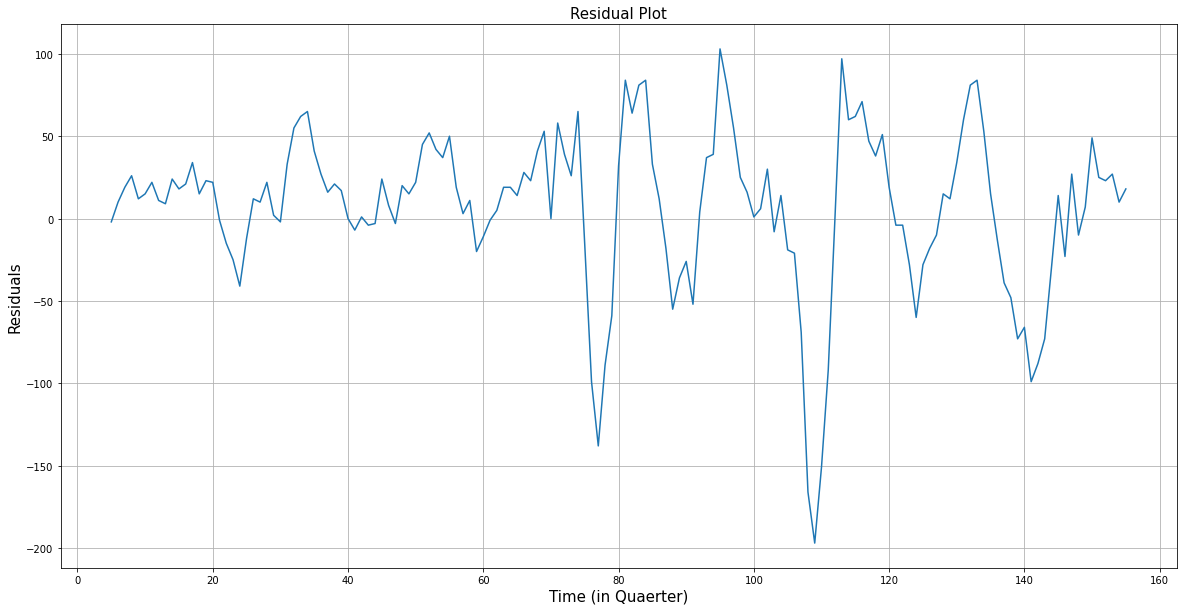

In [97]:
# plotting the time series for residuals

residual_figure = plot_time_series(ts_bricksq_forecasts.residuals, "Time (in Quaerter)", "Residuals", "Residual Plot")

print("Mean of the residuals: ", np.mean(ts_bricksq_forecasts.residuals))

(array([100.19353434, 144.01751658, 152.35009724, 153.6893544 ,
        164.60753588, 182.87928347, 208.04482168, 233.19572515]),
 array([1.38209945e-23, 5.33327067e-32, 8.19938427e-33, 3.29617037e-32,
        1.03112635e-33, 8.29861279e-37, 2.26643769e-41, 6.24213924e-46]))

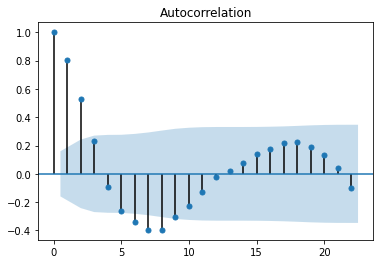

In [107]:
# Plotting the auto-correlation and performing the ljun-box test

plot_acf(ts_bricksq_forecasts.iloc[4:, 2])

sm.stats.acorr_ljungbox(ts_bricksq_forecasts.iloc[4:, 2], lags = 8)

p-value of shapiro normality test:  4.768948258515593e-08


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


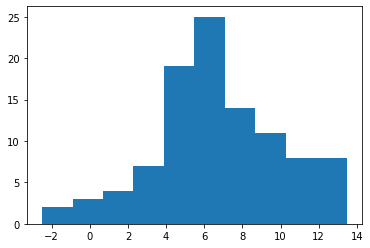

In [111]:
# plotting the hitogram and performing the normality test

plt.hist(ts_brick_transformed.iloc[4:, 2])

shapiro_test = stats.shapiro(ts_bricksq_forecasts.iloc[4:, 2])

print("p-value of shapiro normality test: ", shapiro_test[1])

**Insights of Residual diagnostics**

1. **No Auto-Correlation**: ACF plot and Ljung-box test suggests that there is some auto-correlation between the residuals.

2. **Zero Mean**: Mean is not zero. Using time series and mean value

Some addition residual properties:

1. **Constant Variance**: Variance is not constant throughout the residuals. Due to some outliers in the middle, there is some volatility in the residuals.

2. **Normally Distributed**: Residuals are not normally distributed. Using histogram and shapiro-wilik test.

**Conclusion**: Residuals are not white noise and we are not using all infomation available in the data to make predictions. Seasonal naive is not the best model available for this data.